In [1]:
import matplotlib.pyplot as plt
from glob import glob
from os.path import join

from PIL import Image
from collections import defaultdict

In [2]:
len(glob(join('./train', '*')))

54662

- 전체 이미지의 장수는 54662이다.

In [3]:
file_extention_set = set()
for file_path in glob(join('./train', '*')):
    file_extention_set.add(file_path.split('.')[-1])
file_extention_set

{'jpg'}

- 모든 train image는 jpg이다.

In [4]:
image_resolution = defaultdict(int)
image_resolution_height = defaultdict(int)
image_resolution_width = defaultdict(int)
aspect_ratio = defaultdict(int)
total_pixel = defaultdict(int)
for file_path in glob(join('./train', '*')):
    img = Image.open(file_path)
    width, height = img.size
    image_resolution[(width, height)] += 1
    image_resolution_height[height] += 1
    image_resolution_width[width] += 1
    aspect_ratio[width / height] += 1
    total_pixel[width * height] += 1
    
# len(image_resolution_set)

/opt/conda/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:822: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
/opt/conda/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [5]:
idx = 6000
sorted_image_resolution_items = sorted(image_resolution.items(), key=lambda x : x[1])[:idx:-1]
width_list = [key[0] for key, value in sorted_image_resolution_items]
height_list = [key[1] for key, value in sorted_image_resolution_items]
print(min(aspect_ratio.keys()), max(aspect_ratio.keys()))
print(sorted_image_resolution_items[:20])
print(f"min_height = {min(height_list)}\nmax_height : {max(height_list)}")
print(f"min_width  = {min(width_list)}\nmax_width  : {max(width_list)}")
print(sum([value for key, value in sorted_image_resolution_items]) / sum(image_resolution.values()))
print(sorted_image_resolution_items[-1])

0.2222222222222222 4.102564102564102
[((640, 480), 4302), ((640, 427), 2606), ((480, 640), 1518), ((640, 640), 1266), ((427, 640), 1171), ((640, 426), 891), ((720, 480), 659), ((640, 512), 585), ((800, 533), 498), ((640, 428), 483), ((512, 640), 353), ((426, 640), 352), ((720, 720), 346), ((640, 425), 288), ((480, 720), 261), ((640, 457), 228), ((640, 430), 225), ((640, 433), 221), ((640, 429), 202), ((533, 800), 200)]
min_height = 90
max_height : 800
min_width  = 120
max_width  : 800
0.8841974314880539
((800, 414), 2)


In [6]:
# 데이터 그래프 그리기
def plot_bar_graph(data_dict, title, position):
    plt.subplot(1, 4, position)  # 그림 영역 분할 및 위치 설정
    
    datas = sorted(list(data_dict.keys()))
    counts = list(data_dict.values())

    total_images = sum(counts)
    cumulative_counts = [sum(counts[:datas.index(data) + 1]) for data in datas]
    cumulative_ratios = [count * 100 / total_images for count in cumulative_counts]

    plt.plot(datas, cumulative_ratios, marker='o', linestyle='-', color='b')
    plt.xlabel('Image {title}')
    plt.ylabel('Cumulative Ratio (%)')
    plt.title('Cumulative Distribution of Image {data}')
    plt.ylim(0, 100)  # y 축 범위 설정
    plt.grid(True)
    plt.title(title)


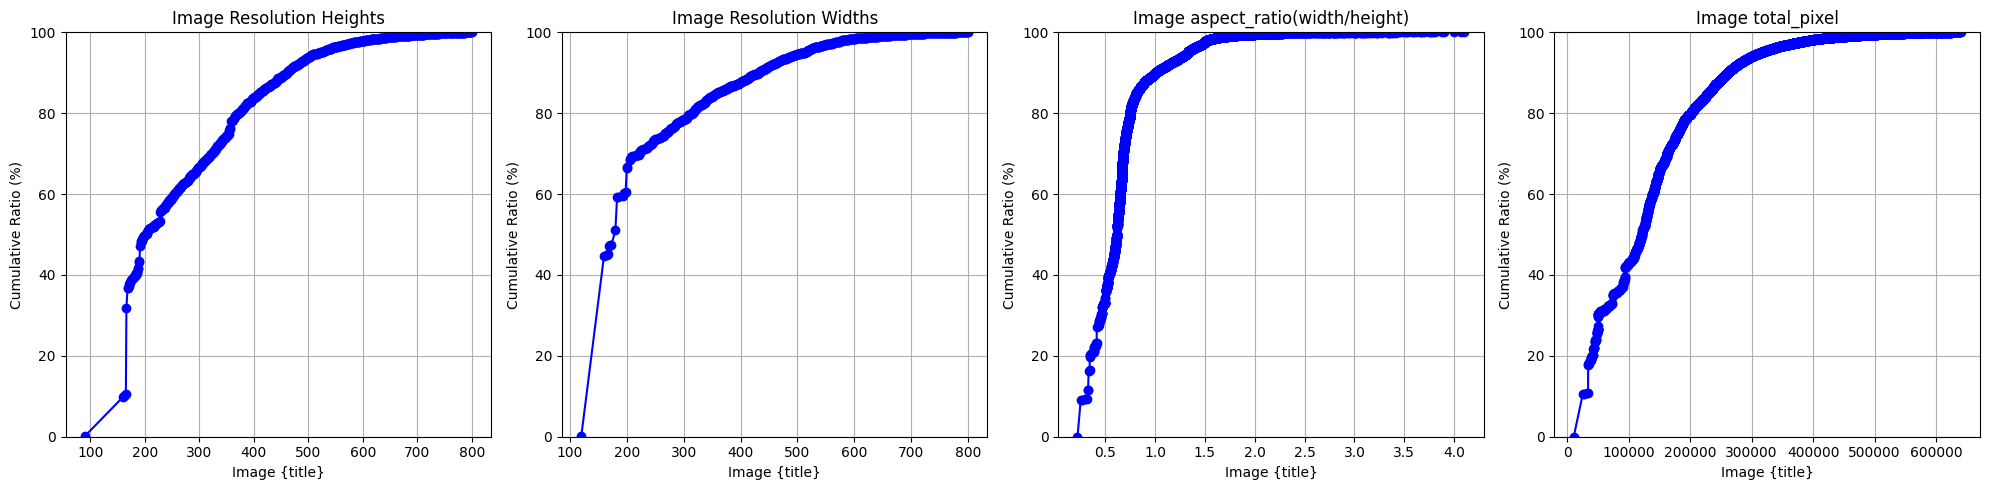

In [7]:
plt.figure(figsize=(20, 5))  # 전체 그림의 크기 설정

plot_bar_graph(image_resolution_height, 'Image Resolution Heights', 1)  # 첫 번째 그래프
plot_bar_graph(image_resolution_width, 'Image Resolution Widths', 2)  # 두 번째 그래프
plot_bar_graph(aspect_ratio, 'Image aspect_ratio(width/height)', 3)  # 두 번째 그래프
plot_bar_graph(total_pixel, 'Image total_pixel', 4)  # 두 번째 그래프


plt.tight_layout()  # 그래프 간격 조절
plt.show()

- 종회비가 4.5에 육박하는 굉장히 좋지 않은 그림도 train dataset으로 가지고 있고, 
- 종횡비의 비율로 따졌을 때, 세로로 더 긴 이미지가 많은 것을 비율적으로 확인할 수 있었다.
- 정해진 몇몇의 크기를 가지는게 많았고, 
- 비율상 640 * 480의 크기를 가지는게 제일 많았다.(4302개)
- 그래도 적잔히 600 x 600 근방으로 Data가 모두 포함되는 것 같았고, 생각보다 고화질이다.
    - 고화질이기에, 저화질로 줄였을 때 정보 손실이 많을까 싶다
    - 기본적인 학습 방향은 저화질(ex : 224 x 224)로 model 및 다양한 hyperparameter를 찾다가 적당히 seturation되면 고화질로 변경해 학습을 최종적으로 마무리하는게 옳을 듯 하다.
    - 종횡비는 크게 문제가 안될 것 같다. 대부분의 객체가 거시적인 관점에서는 비율 관련된 정보가 크게 중요하지 않을 듯 하다.

# Text EDA

## 선명도 및 왜곡
1. b: 이미지의 물체나 경계가 명확하게 표현되는 정도를 나타냅니다. 선명한 이미지는 세부 사항이 뚜렷하게 보이며, 모호하지 않습니다.

2. Clarity (명료도): 이미지의 선명도와 관련하여 물체의 경계와 세부 사항이 명확하게 표현되는 정도를 나타냅니다. 명료한 이미지는 세부 사항이 뚜렷하게 보이고, 흐릿하지 않습니다.

3. Noise (잡음): 이미지에 무작위로 흩어진 작은 잡음이나 그림자로 인해 선명도가 떨어지고 세부 사항이 흐려지는 현상을 나타냅니다.

4. Distortion (왜곡): 이미지의 형태나 구조가 원래의 형태에서 벗어나거나 왜곡된 것을 나타냅니다. 왜곡된 이미지는 정확한 비율과 모양을 유지하지 않을 수 있습니다.

5. Artifact (아티팩트): 이미지 처리나 압축 등으로 인해 발생하는 비정상적인 현상이나 패턴을 의미합니다. 아티팩트는 이미지의 선명도와 명료도를 저하시키거나 왜곡시킬 수 있습니다.

6. Blur (흐림): 이미지의 선명도가 떨어져 물체의 경계나 세부 사항이 흐릿하게 보이는 현상을 나타냅니다. 흐린 이미지는 명료도가 저하되어 세부 사항이 구분되기 어려울 수 있습니다.

7. Fuzziness (흐림): 이미지의 물체나 경계가 흐려지거나 모호한 상태를 나타냅니다. 흐린 이미지는 세부 사항이 뚜렷하지 않고 구분하기 어려울 수 있습니다.

8. 머쉬니스(Mushiness): 이 용어는 일반적으로 이미지나 물체의 경계가 불명확하고 모호하게 표현되는 상태를 나타냅니다. 이미지나 물체의 세부 사항이 흐려지거나 구분하기 어렵게 보이는 경우를 묘사하는 용어로 사용됩니다.

9. 퍼지니스(Fuzziness): 이 용어는 이미지나 물체의 선명도가 저하되어 물체의 경계나 세부 사항이 흐릿하게 보이는 상태를 나타냅니다. 이미지나 물체가 모호하게 나타나는 현상을 표현하는 용어로 사용됩니다.

10. Softness (부드러움): 이미지나 물체의 선명한 경계나 세부 사항이 부드럽게 나타나는 상태를 나타냅니다. 선명도가 낮아져 물체의 특징이 부드럽게 녹아들어보이는 경우에 사용될 수 있습니다.

11. Clutter (잡음): 이미지에 무작위로 흩어진 작은 잡음이나 비정상적인 요소로 인해 이미지의 선명도와 명료도가 저하되는 현상을 나타냅니다.

12. Ghosting (흐릿한 선): 이미지의 특정 물체나 경계 주변에 흐릿하거나 어렴풋한 선이 형성되는 현상을 나타냅니다. 이는 이미지 왜곡이나 광학적 현상에 의해 발생할 수 있습니다.

13. Chromatic Aberration (색차 비틀림): 렌즈나 광학 시스템의 특성으로 인해 빛이 다르게 굴절되어 물체 주변에 색상 비틀림이 발생하는 현상을 나타냅니다. 왜곡 및 색상 변형을 함께 표현할 때 사용될 수 있습니다.

14. Blurry Edges (흐린 경계): 이미지의 물체나 경계 주변이 흐릿하게 나타나는 상태를 나타냅니다. 이미지 선명도가 떨어져 물체의 경계가 불분명하게 보일 수 있습니다.

15. **Glossy (광택 있는):** 이미지나 물체의 선명한 부분이 광택을 띠며 반사되는 상태를 나타냅니다.

16. **Defocus (흐림):** 초점이 맞지 않아 물체나 이미지의 일부가 흐릿하게 보이는 상태를 나타냅니다.

17. **Jagged (톱니모양의):** 이미지나 물체의 경계나 선이 톱니 모양의 형태를 띠는 상태를 나타냅니다.

18. **Displacement (변위):** 이미지나 물체가 원래 위치에서 벗어나 이동되어 보이는 상태를 나타냅니다.

19. **Distorted Colors (왜곡된 색상):** 이미지의 색상이 원래의 색과 다른 색으로 왜곡되어 나타나는 상태를 나타냅니다.

20. **Uneven Lighting (불균일한 조명):** 이미지나 물체의 표면에 불균일하게 조명이 밝거나 어두워져 나타나는 상태를 나타냅니다.

21. **Fractured (파손된):** 이미지나 물체의 선명도가 저하되어 불균일한 구조로 나타나는 상태를 나타냅니다.

22. **Blur Trails (흐림 트레일):** 빠르게 움직이는 물체의 경로를 따라서 흐릿한 트레일이 형성되는 상태를 나타냅니다.

23. **Warping (변형):** 이미지나 물체의 형태나 구조가 변형되어 원래의 형태와 다른 형태로 나타나는 상태를 나타냅니다.

24. **Moiré Patterns (모아레 패턴):** 이미지나 물체에서 발생하는 규칙적인 반복 패턴으로 인해 왜곡이 발생하는 상태를 나타냅니다.

25. **Smeared (스메어 처리된):** 이미지나 물체의 특정 부분이 흐리게 되거나 퍼져 보이는 상태를 나타냅니다.

26. **Posterization (포스터화):** 이미지의 색상 및 톤이 강제로 간소화되어 나타나는 상태를 나타냅니다.

27. **Ghosting (희미한 영상):** 이미지나 물체의 선명한 부분이 흐려지면서 희미한 복제 형태로 나타나는 상태를 나타냅니다.

28. **Crunchiness (짭짤함):** 이미지나 물체의 선명도가 높아져 물체의 세부 사항이 부각되는 상태를 나타냅니다.

29. **Subdued Colors (무딘 색상):** 이미지의 색상이 원래보다 더 흐려지거나 어둡게 나타나는 상태를 나타냅니다.

30. **Speckling (얼룩진):** 작은 잡음이나 점이 이미지나 물체에 무작위로 흩어져 나타나는 상태를 나타냅니다.

31. **Flare (플레어):** 강한 조명이나 빛으로 인해 이미지 주변에 반사되는 현상이 나타나는 상태를 나타냅니다.

32. **Patchy (불균일한):** 이미지나 물체의 표면이 불균일하게 보이는 상태를 나타냅니다.

33. **Veiling Glare (가림 빛):** 밝은 조명이나 빛으로 인해 이미지나 물 체 전체가 흐릿하게 보이는 상태를 나타냅니다.

34. **Gradient Banding (그라데이션 밴딩):** 부드러운 색상 변화가 아닌 단순한 색상 단계로 인해 이미지나 그라데이션에 밴딩 현상이 나타나는 상태를 나타냅니다.

이러한 용어들은 이미지의 선명도, 왜곡 및 잡음을 다양한 측면에서 묘사하는 데 사용될 수 있습니다. 상황과 컨텍스트에 맞게 적절한 용어를 선택하여 이미지를 설명하는 데 활용하시면 됩니다.


## 밝기 (Brightness) 및 명암 (Contrast)

1. **Exposure (노출):** 이미지의 밝기 수준을 조절하는 것으로, 노출이 높을수록 이미지가 밝게 나타나며, 낮을수록 어둡게 나타납니다.

2. **Contrast (대비):** 이미지 내 다른 픽셀 값 간의 밝기 차이를 나타내는 것으로, 높은 대비는 밝은 부분과 어두운 부분을 뚜렷하게 나타냅니다.

3. **Highlight (하이라이트):** 이미지의 밝은 영역으로, 높은 밝기 값에 해당하는 부분을 가리킵니다.

4. **Shadow (그림자):** 이미지의 어두운 영역으로, 낮은 밝기 값에 해당하는 부분을 가리킵니다.

5. **Dynamic Range (다이내믹 레인지):** 이미지 내 밝은 부분과 어두운 부분 사이의 밝기 범위를 의미합니다.

6. **Gamma (감마):** 디스플레이나 이미지 처리에서 밝기 값의 조정을 위해 사용되는 매개 변수입니다.

7. **Tone Mapping (톤 매핑):** 고 다이내믹 레인지 이미지를 표시하기 위해 밝기 값을 조절하는 기술입니다.

8. **HDR (High Dynamic Range):** 높은 다이내믹 레인지를 가진 이미지를 생성하는 기술이나 형식을 나타냅니다.

## 색감 (Color) 관련 용어

9. **Temperature (온도):** 이미지의 색상 온도를 나타내며, 냉색(파란색)과 온색(빨간색)의 균형을 조절합니다.

10. **Tint (틴트):** 이미지의 초록색 또는 자주색 편향을 조절하여 색상 균형을 조정합니다.

11. **White Balance (화이트 밸런스):** 이미지 내 흰색이 실제로 흰색으로 나타나도록 색상 균형을 조절하는 것입니다.

12. **Vibrance (비브런스):** 이미지의 색상을 보정하여 과도한 포화감 없이 더 생동감 있게 만듭니다.

13. **Saturation (포화도):** 이미지의 색상의 강도나 선명도를 조절하여 색상의 진함 또는 옅음을 조정합니다.

14. **Hue (색조):** 색상 활자에 해당하는 색상 원의 위치를 나타냅니다.

15. **Color Balance (색상 밸런스):** 이미지 내의 다양한 색상의 균형을 조정하는 것입니다.

16. **Color Cast (색상 영향):** 특정 색상이 이미지 전체에 영향을 미치는 현상을 나타냅니다.

17. **Color Grading (색조 조정):** 영상 또는 이미지의 색감을 조정하여 특정 분위기나 느낌을 표현하는 것입니다.

## 분위기
1. **Warm (따뜻한):** 이미지가 따뜻한 색조와 톤을 가지며, 온기와 친근함을 나타내는 분위기입니다.

2. **Cool (시원한):** 이미지가 시원한 색조와 톤을 가지며, 차가움과 청량함을 나타내는 분위기입니다.

3. **Surreal (초현실적인):** 현실과 다르거나 꿈의 세계와 유사한 분위기를 나타내는 이미지입니다.

4. **Serene (고요한):** 이미지가 조용하고 평온한 분위기를 나타내며, 안정감과 평화를 전달합니다.

5. **Ethereal (에테리얼):** 이미지가 하늘 같이 미묘하고 신비로운 분위기를 갖추며, 빛과 투명성을 강조합니다.

6. **Mysterious (신비로운):** 이미지가 미지의 세계나 미스터리한 분위기를 나타내며, 호기심과 이해하기 어려움을 불러일으킵니다.

7. **Dreamy (꿈같은):** 이미지가 꿈과 현실의 경계를 흐릿하게 만드는 분위기를 전달합니다.

8. **Melancholic (멜랑꼴릭):** 이미지가 약간 슬픈 또는 우울한 느낌을 갖추며, 잔잔한 애수를 묘사합니다.

9. **Vibrant (활기찬):** 이미지가 생기 넘치고 활기찬 분위기를 나타내며, 활발하고 다채로운 느낌을 전달합니다.

10. **Gloomy (우울한):** 이미지가 어둡고 침울한 분위기를 나타내며, 비관적이거나 우울한 느낌을 강조합니다.

11. **Nostalgic (향수적인):** 이미지가 과거를 회상하거나 추억에 젖은 느낌을 전달하는 분위기입니다.

12. **Enigmatic (수수께끼같은):** 이미지가 미스터리한 분위기를 풍기며, 이해하기 어려운 느낌을 강조합니다.

13. **Romantic (로맨틱한):** 이미지가 감성적이고 로맨틱한 느낌을 전달하여 사랑과 감동을 강조합니다.

14. **Whimsical (기발한):** 이미지가 재치 있고 독특한 분위기를 나타내며, 기발함과 창의성을 강조합니다.

15. **Magical (마법 같은):** 이미지가 마법과 특별한 느낌을 전달하여 마법적인 경험을 묘사합니다.

16. **Soothing (진정한):** 이미지가 안정적이고 진정한 분위기를 전달하여 편안함과 안락함을 느끼게 합니다.

17. **Dramatic (극적인):** 이미지가 강렬하고 인상적인 분위기를 갖추며, 감정을 강조하거나 강렬한 느낌을 전달합니다.

18. **Mystical (신비로운):** 이미지가 신비로운 분위기와 영적인 느낌을 전달하여 불가사의한 경험을 묘사합니다.

19. **Tranquil (평온한):** 이미지가 고요하고 조용한 분위기를 나타내며, 평화로움을 강조합니다.

20. **Playful (재미있는):** 이미지가 유쾌하고 재미있는 분위기를 갖추며, 놀이와 유쾌함을 전달합니다.

# Metric
이 식은 자동 이미지 캡션 생성 모델의 성능을 정량적으로 평가하기 위한 복합적인 지표를 나타냅니다. 이 식은 주로 이미지 캡션 생성 모델의 생성된 캡션과 실제 인간의 참조 캡션들 간의 유사성을 평가하여 모델의 품질을 측정하는 데 사용됩니다. 각 지표는 서로 다른 측면을 고려하여 가중치를 부여하며, 모든 지표의 조합으로 총 점수를 계산합니다.

각 지표의 역할을 이해해보겠습니다:

1. CIDEr-D (Consensus-based Image Description Evaluation - Difference):
CIDEr-D는 참조 캡션들 간의 다양성을 측정하여 캡션 생성 모델의 다양성을 평가하는 지표입니다. 다양한 캡션을 생성하는 것이 중요한데, 이는 한 가지 방법만 사용하는 단순한 모델보다 더 좋은 결과를 도출할 수 있습니다.

2. METEOR (Metric for Evaluation of Translation with Explicit ORdering):
METEOR은 생성된 캡션과 참조 캡션 사이의 의미론적 유사성을 평가하는 지표입니다. 문법적이거나 의미론적인 특징들을 고려하여 유사성을 측정합니다.

3. BLEU (Bilingual Evaluation Understudy):
BLEU는 생성된 캡션과 참조 캡션 간의 단어 일치도를 측정하는 지표입니다. 주로 자동 번역 평가에 사용되며, 여기서는 BLEU-4와 BLEU-3을 조합하여 사용합니다.

4. ROUGE-L (Recall-Oriented Understudy for Gisting Evaluation - Longest Common Subsequence):
ROUGE-L은 생성된 캡션과 참조 캡션 간의 긴 부분 일치를 측정하는 지표입니다. 주로 요약 문장의 품질을 평가하는 데 사용되며, 캡션 생성에서도 유사성을 측정하는 데 활용됩니다.

이러한 지표들은 모두 자동적으로 생성된 캡션과 인간의 참조 캡션 간의 차이를 측정하기 위해 설계되었습니다. 이 식은 이러한 다양한 측면을 ganz이고 가중 평균하여 최종적인 정량적인 평가 점수를 생성합니다. 점수가 높을수록 생성된 캡션의 품질이 우수하다고 해석할 수 있습니다. 이 평가 점수는 다양한 캡션 생성 모델들을 비교하거나 개선하는 데 도움이 될 수 있습니다.